0 MTF for elecricity

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

## Importing the dataset

In [105]:
df = pd.read_stata('data/Main dataset.dta')
df.shape

(3295, 730)

## Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability - not collected in this report
6. legality
7. Health and safety

In [106]:
df.columns

Index(['HHID', 'Cluster', 'strata', 'Province', 'District', 'Sector',
       'Cellule', 'Village', 'B1', 'B2',
       ...
       'T28', 'T28B', 'T28C', 'DATE_START', 'TIME_START', 'DATE_END',
       'TIME_END', 'cluster', 'sample_weight', 'Locality'],
      dtype='object', length=730)

# Attribute: Capacity

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid (kWh)
2. C64: Power available from the mini grid (kWh)
3. C88: Power available from the generator set (kWh)
4. C117: Power available from the inverter (kWh)
5. C119: Power available from the batteries (this variable uses a,b,c,d; however b,c,d contain no information) (kWh)
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [107]:
df_capacity = df[['C22', 
                  'C64',
                  'C88',
                  'C117',
                  'C119A']]
df_capacity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C22     1478 non-null   float64
 1   C64     8 non-null      float64
 2   C88     1 non-null      float64
 3   C117    1 non-null      float64
 4   C119A   4 non-null      float64
dtypes: float64(5)
memory usage: 154.5 KB


In [108]:
df_capacity['C22'][0:10]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6     9.30
7      NaN
8    37.21
9      NaN
Name: C22, dtype: float64

In [109]:
# renaming the columns
df_capacity.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

## Total_capacity
Total capacity is the sum of capacities of all the power sources.

1. Page 14 of MTF Energy Access Country Diagnostic report confirms that the average monthly household consumption of electricity is 20.8 kWh nationwide, 29.2 kWh in urban areas, and 9.9 kWh in rural areas. This means that the values recorded in the MTF survey for capacity are in kWh.

2. 26.8% of households households have been assessed as having basic access to electricity supply. The remaining 73.2% have no electricity source

In [110]:
lst=[]
for i in range(df_capacity.shape[0]):
    temp=0
    for j in range(df_capacity.shape[1]):
        if math.isnan(df_capacity.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_capacity.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_capacity["Total_Capacity_in_kWh_month"] = lst

In [111]:
df_capacity[50:60]

,National_Grid,Mini_Grid,Generator,Inverter,Battery,Total_Capacity_in_kWh_month
50,NaN,NaN,NaN,NaN,NaN,0.00
51,NaN,NaN,NaN,NaN,NaN,0.00
52,NaN,NaN,NaN,NaN,NaN,0.00
53,NaN,NaN,NaN,NaN,NaN,0.00
54,NaN,NaN,NaN,NaN,NaN,0.00
55,18.60,NaN,NaN,NaN,NaN,18.60
56,20.93,NaN,NaN,NaN,NaN,20.93
57,4.65,NaN,NaN,NaN,NaN,4.65
58,4.65,NaN,NaN,NaN,NaN,4.65
59,NaN,NaN,NaN,NaN,NaN,0.00


In [112]:
df_capacity["Total_Capacity_in_kWh_month"].value_counts()

0.000      1810
4.650       287
9.300       220
18.600      152
2.330       137
23.260      118
13.950      117
6.980        84
27.910       60
46.510       49
37.210       39
69.770       29
11.630       26
93.020       23
32.560       20
55.810       12
139.530      11
16.280       10
5.580         8
20.930        6
41.860        6
186.050       6
2.790         5
3.260         4
3.720         4
162.790       4
74.420        4
116.280       3
9.302         2
4.651         2
83.720        2
8.370         2
6.050         2
34.880        2
65.120        2
37.205        2
11.160        2
232.560       2
76.740        1
10.000        1
2.000         1
12.000        1
400.000       1
60.470        1
79.070        1
4.190         1
290.000       1
9.301         1
279.070       1
88.370        1
58.140        1
25.580        1
4.020         1
97.670        1
325.580       1
18.602        1
195.350       1
5.120         1
10.230        1
Name: Total_Capacity_in_kWh_month, dtype: int64

The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [113]:
df_capacity["Total_Capacity_in_W"] = df_capacity["Total_Capacity_in_kWh_month"].apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [114]:
# Replacing 0 values again with NaN
df_capacity["Total_Capacity_in_W"].replace(0, np.nan, inplace=True)
#df_capacity["Total_Capacity_in_W"]

In [115]:
#Replacing NaN values with "Missing_data" 
df_capacity["Total_Capacity_in_W"] = df_capacity["Total_Capacity_in_W"].apply(lambda x: "Missing_data" if math.isnan(x) else x)

### Calculating the tier level

In [116]:
def fun_E_capacity(Total_Capacity):
    if Total_Capacity == 'Missing_data':
        return 0
    elif Total_Capacity<3:
        return 0
    elif 3 <= Total_Capacity < 50:
        return 1
    elif 50 <= Total_Capacity < 200:
        return 2
    elif 200 <= Total_Capacity < 800:
        return 3
    elif 800 <= Total_Capacity < 2000:
        return 4
    else:
        return 5
    
func = np.vectorize(fun_E_capacity)
df_capacity["E_capacity"] = func(df_capacity["Total_Capacity_in_W"])
#df_capacity["E_capacity"] 

Text(0.5, 1.0, 'TIER levels based on power capacity')

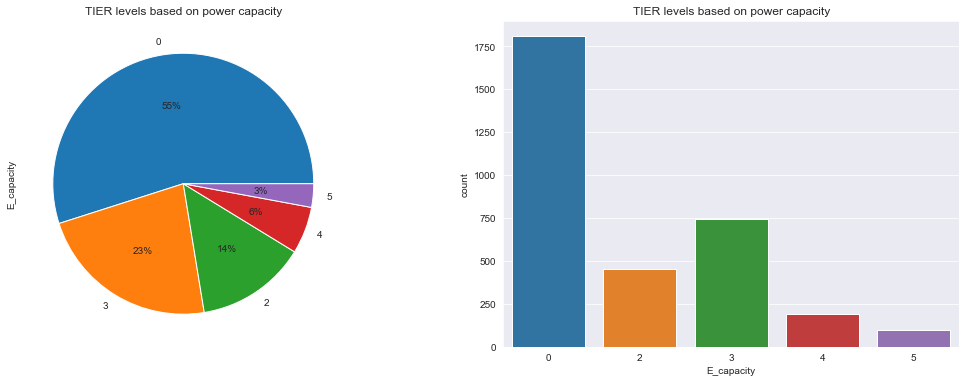

In [117]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_capacity["E_capacity"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('E_capacity',data=df_capacity,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In [118]:
#sns.pairplot(df_capacity)

# Attribute: Availabilty

## Availability: Day and night

### Day Total-Availability

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C26A represents the hours of electricity available each day and night from the national grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and night from  the national grid in the typical months.
* C68A represents the hours of electricity available each day and night from the mini grid in the worst months.
* Whereas, C68B represents the hours of electricity available each day and night from  the mini grid in the typical months.
* C107A represents the hours of electricity available each day and night from the generator set in the worst months.
* Whereas, C107B represents the hours of electricity available each day and night from  the generator set in the typical months.
* C127 represents the hours of electricity available each day from the rechargeable battery.
* C137A represents the hours of electricity available each day and night from pico-hydro in the worst months.
* Whereas, C137B represents the hours of electricity available each day and night from  pico-hydro in the typical months.
* C172A represents the hours of electricity available each day and night from  main solar based devices in the worst months.
* Whereas, C172B represents the hours of electricity available each day and night from  main solar based devices in the typical months.

In [119]:
df_availability_day= df[['C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B']]
df_availability_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C26A    652 non-null    category
 1   C26B    1591 non-null   category
 2   C68A    2 non-null      category
 3   C68B    8 non-null      category
 4   C107A   1 non-null      category
 5   C107B   1 non-null      category
 6   C127    4 non-null      category
 7   C137A   3 non-null      category
 8   C137B   5 non-null      category
 9   C172A   39 non-null     category
 10  C172B   109 non-null    category
dtypes: category(11)
memory usage: 224.8 KB


In [120]:
df_availability_day.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Battery','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [121]:
df['C26A'][65:75]

65           NaN
66           NaN
67           NaN
68    Don't know
69           NaN
70           NaN
71             2
72           NaN
73           NaN
74            12
Name: C26A, dtype: category
Categories (25, object): [1 < 2 < 3 < 4 ... 22 < 23 < 24 < Don't know]

In [122]:
len(df_availability_day[df_availability_day["National_grid_Worst"] == "Don't know"])

112

In [123]:
#National Grid
df_availability_day['National_grid_Worst'] = pd.to_numeric(df_availability_day['National_grid_Worst'], errors='coerce')
df_availability_day['National_grid_Typical'] = pd.to_numeric(df_availability_day['National_grid_Typical'], errors='coerce')
df_availability_day['National_grid_Total'] = df_availability_day['National_grid_Worst'].fillna(value=df_availability_day['National_grid_Typical'])

In [124]:
#Mini Grid 
df_availability_day['Mini_grid_Worst'] = pd.to_numeric(df_availability_day['Mini_grid_Worst'], errors='coerce')
df_availability_day['Mini_grid_Typical'] = pd.to_numeric(df_availability_day['Mini_grid_Typical'], errors='coerce')
df_availability_day['Mini_grid_Total'] = df_availability_day['Mini_grid_Worst'].fillna(value=df_availability_day['Mini_grid_Typical'])

In [125]:
#Generator Set
df_availability_day['Generator_set_Worst'] = pd.to_numeric(df_availability_day['Generator_set_Worst'], errors='coerce')
df_availability_day['Generator_set_Typical'] = pd.to_numeric(df_availability_day['Generator_set_Typical'], errors='coerce')
df_availability_day['Generator_set_Total'] = df_availability_day['Generator_set_Worst'].fillna(value=df_availability_day['Generator_set_Typical'])

In [126]:
#Pico Hydro
df_availability_day['Pico_hydro_Worst'] = pd.to_numeric(df_availability_day['Pico_hydro_Worst'], errors='coerce')
df_availability_day['Pico_hydro_Typical'] = pd.to_numeric(df_availability_day['Pico_hydro_Typical'], errors='coerce')
df_availability_day['Pico_hydro_Total'] = df_availability_day['Pico_hydro_Worst'].fillna(value=df_availability_day['Pico_hydro_Typical'])

In [127]:
#Solar Devicce
df_availability_day['Solar_device_Worst'] = pd.to_numeric(df_availability_day['Solar_device_Worst'], errors='coerce')
df_availability_day['Solar_device_Typical'] = pd.to_numeric(df_availability_day['Solar_device_Typical'], errors='coerce')
df_availability_day['Solar_device_Total'] = df_availability_day['Solar_device_Worst'].fillna(value=df_availability_day['Solar_device_Typical'])

In [128]:
#Taking only the total values into consideration
df_availability_day = df_availability_day[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total','Battery']]

In [129]:
#Changing the string variables into float/int
df_availability_day = df_availability_day.replace(to_replace="Don't know",value=0)
df_availability_day = df_availability_day.apply(pd.to_numeric, errors='coerce')

In [130]:
df_availability_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1459 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     4 non-null      float64
 4   Solar_device_Total   103 non-null    float64
 5   Battery              4 non-null      float64
dtypes: float64(6)
memory usage: 340.2 KB


### Day Calculating the tiel level

In [131]:
lst=[]
for i in range(df_availability_day.shape[0]):
    temp=0
    for j in range(df_availability_day.shape[1]):
        if math.isnan(df_availability_day.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_availability_day.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_availability_day["Total_availability"] = lst

In [132]:
len(df_availability_day[df_availability_day["Total_availability"] == "Don't know"])

0

In [133]:
df_availability_day['Total_availability'] = df_availability_day.replace(np.nan, 'Missing_data', regex=True)

In [134]:
df_availability_day["Total_availability"].value_counts()

Missing_data    1836
24.0             292
22.0             240
23.0             225
20.0             204
12.0              74
21.0              61
15.0              51
18.0              46
10.0              32
6.0               29
2.0               24
5.0               23
19.0              22
3.0               21
16.0              17
4.0               16
1.0               16
14.0              14
17.0              14
8.0               12
13.0              11
11.0               7
7.0                5
9.0                3
Name: Total_availability, dtype: int64

In [135]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def fun_E_availability(Total_availability):
    if Total_availability == 'Missing_data':
        return 0
    elif Total_availability == 0:
        return 0
    elif 0 < Total_availability < 4:
        return 0
    elif 4 <= Total_availability < 8:
        return 1
    elif 8 <= Total_availability < 16:
        return 3
    elif 16 <= Total_availability < 23:
        return 4
    else:
        return 5
    
func = np.vectorize(fun_E_availability)
df_availability_day["E_availability_day"] = func(df_availability_day["Total_availability"])

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

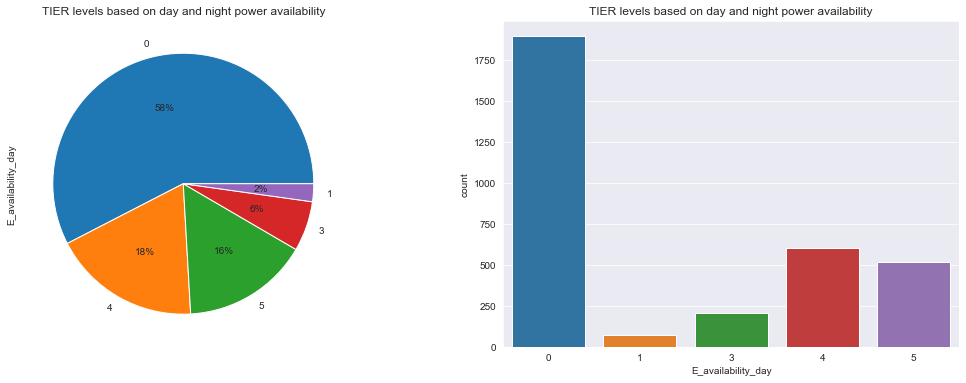

In [136]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_availability_day['E_availability_day'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('E_availability_day',data=df_availability_day,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

### Evening Total-Avaliability

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C27A represents the hours of electricity available each evening from the national grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from  the national grid in the typical months.
* C69A represents the hours of electricity available each evening from the mini grid in the worst months.
* Whereas, C69B represents the hours of electricity available each evening from  the mini grid in the typical months.
* C108A represents the hours of electricity available each evening from the generator set in the worst months.
* Whereas, C108B represents the hours of electricity available each evening from  the generator set in the typical months.
* C138A represents the hours of electricity available each evening from pico-hydro in the worst months.
* Whereas, C138B represents the hours of electricity available each evening from  pico-hydro in the typical months.
* C173A represents the hours of electricity available each evening from main solar based devices in the worst months.
* Whereas, C173B represents the hours of electricity available each evening from  main solar based devices in the typical months.

In [137]:
df_availability_evening= df[['C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B']]
df_availability_evening.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C27A    652 non-null    category
 1   C27B    1591 non-null   category
 2   C69A    2 non-null      category
 3   C69B    8 non-null      category
 4   C108A   1 non-null      category
 5   C108B   1 non-null      category
 6   C138A   3 non-null      category
 7   C138B   5 non-null      category
 8   C173A   39 non-null     category
 9   C173B   109 non-null    category
dtypes: category(10)
memory usage: 219.3 KB


In [138]:
df_availability_evening.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [139]:
len(df_availability_evening[df_availability_evening["National_grid_Worst"] == "Don't know"])

52

### Evening Calculating the tier level

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the MTF takes the worst condition into account for enery access assessment.

In [140]:
#National Grid
df_availability_evening['National_grid_Worst'] = pd.to_numeric(df_availability_evening['National_grid_Worst'], errors='coerce')
df_availability_evening['National_grid_Typical'] = pd.to_numeric(df_availability_evening['National_grid_Typical'], errors='coerce')
df_availability_evening['National_grid_Total'] = df_availability_evening['National_grid_Worst'].fillna(value=df_availability_evening['National_grid_Typical'])

#Mini Grid 
df_availability_evening['Mini_grid_Worst'] = pd.to_numeric(df_availability_evening['Mini_grid_Worst'], errors='coerce')
df_availability_evening['Mini_grid_Typical'] = pd.to_numeric(df_availability_evening['Mini_grid_Typical'], errors='coerce')
df_availability_evening['Mini_grid_Total'] = df_availability_evening['Mini_grid_Worst'].fillna(value=df_availability_evening['Mini_grid_Typical'])

#Generator Set
df_availability_evening['Generator_set_Worst'] = pd.to_numeric(df_availability_evening['Generator_set_Worst'], errors='coerce')
df_availability_evening['Generator_set_Typical'] = pd.to_numeric(df_availability_evening['Generator_set_Typical'], errors='coerce')
df_availability_evening['Generator_set_Total'] = df_availability_evening['Generator_set_Worst'].fillna(value=df_availability_evening['Generator_set_Typical'])

#Pico Hydro
df_availability_evening['Pico_hydro_Worst'] = pd.to_numeric(df_availability_evening['Pico_hydro_Worst'], errors='coerce')
df_availability_evening['Pico_hydro_Typical'] = pd.to_numeric(df_availability_evening['Pico_hydro_Typical'], errors='coerce')
df_availability_evening['Pico_hydro_Total'] = df_availability_evening['Pico_hydro_Worst'].fillna(value=df_availability_evening['Pico_hydro_Typical'])

#Solar Devicce
df_availability_evening['Solar_device_Worst'] = pd.to_numeric(df_availability_evening['Solar_device_Worst'], errors='coerce')
df_availability_evening['Solar_device_Typical'] = pd.to_numeric(df_availability_evening['Solar_device_Typical'], errors='coerce')
df_availability_evening['Solar_device_Total'] = df_availability_evening['Solar_device_Worst'].fillna(value=df_availability_evening['Solar_device_Typical'])


#Taking only the total values into consideration
df_availability_evening = df_availability_evening[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total']]

In [141]:
df_availability_evening = df_availability_evening.replace(to_replace="Don't know",value=0)
df_availability_evening = df_availability_evening.apply(pd.to_numeric, errors='coerce')
df_availability_evening.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1514 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   106 non-null    float64
dtypes: float64(5)
memory usage: 314.5 KB


In [142]:
df_availability_evening['National_grid_Total'].value_counts()

4.0    764
3.0    394
2.0    239
1.0    117
Name: National_grid_Total, dtype: int64

In [143]:
lst=[]
for i in range(df_availability_evening.shape[0]):
    temp=0
    for j in range(df_availability_evening.shape[1]):
        if math.isnan(df_availability_evening.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_availability_evening.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_availability_evening["Total_availability"] = lst

In [144]:
len(df_availability_evening[df_availability_evening["Total_availability"] == 888])

0

In [145]:
df_availability_evening["Total_availability"] = df_availability_evening["Total_availability"].replace(888, np.nan, regex=True)

In [146]:
df_availability_evening['Total_availability'] = df_availability_evening.replace(np.nan, 'Missing_data', regex=True)

In [147]:
# AVAILABILITY: Evening
#Note: conditions for TIER 4 and 5 are the same

def fun_E_availability(Total_availability):
    if Total_availability == 'Missing_data':
        return 0
    elif Total_availability == 0:
        return 0
    elif 0 < Total_availability < 1:
        return 0
    elif 1 <= Total_availability < 2:
        return 1
    elif 2 <= Total_availability < 3:
        return 2
    elif 3 <= Total_availability < 4:
        return 3
    else:
        return 4
    
func = np.vectorize(fun_E_availability) 
df_availability_evening["E_availability_evening"] = func(df_availability_evening["Total_availability"])

Text(0.5, 1.0, 'TIER levels based on evening power availability')

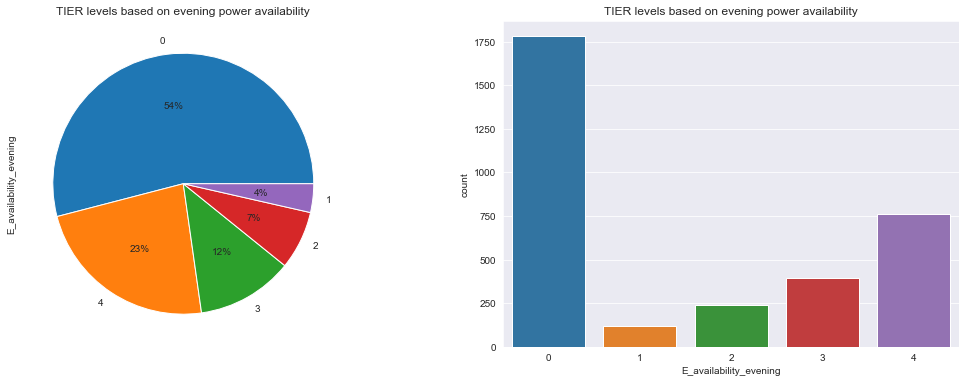

In [148]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_availability_evening['E_availability_evening'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on evening power availability')

#Barplot
sns.countplot('E_availability_evening',data=df_availability_evening,ax=ax[1])
ax[1].set_title('TIER levels based on evening power availability')

In the above graph we can see that the evening availability in:

1. TIER 1 contributes to 4% of evening availability which is at least 1 hours
2. TIER 2 contributes to 8% of evening availability which is at least 2 hours
3. TIER 3 contributes to 12% of evening availability which is at least 3 hours
4. TIER 4&5 contributes to 24% of evening availability which is at least 4 hours

# Attribute: Reliability

Methodology:

To understand the attribute more carefully, features from all the power sources have been taken into consideration; 
* C29A represents the electricity disruption from the national grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the national grid in the actual months.
* C71A represents the electricity disruption from the mini grid in the worst months. 
* Whereas, C71B represents the electricity disruption from the mini grid in the actual months.

In [149]:
df_reliability = df[['C29A','C29B','C71A','C71B']]
df_reliability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C29A    652 non-null    category
 1   C29B    1591 non-null   category
 2   C71A    2 non-null      category
 3   C71B    8 non-null      category
dtypes: category(4)
memory usage: 199.7 KB


In [150]:
df_reliability.columns = ['National_grid_Worst','National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical']

## Total Reliability

In this step Total reliability from all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [151]:
#National Grid
df_reliability['National_grid_Worst'] = pd.to_numeric(df_reliability['National_grid_Worst'], errors='coerce')
df_reliability['National_grid_Typical'] = pd.to_numeric(df_reliability['National_grid_Typical'], errors='coerce')
df_reliability['National_grid_Total'] = df_reliability['National_grid_Worst'].fillna(value=df_reliability['National_grid_Typical'])

#National Grid
df_reliability['Mini_grid_Worst'] = pd.to_numeric(df_reliability['Mini_grid_Worst'], errors='coerce')
df_reliability['Mini_grid_Typical'] = pd.to_numeric(df_reliability['Mini_grid_Typical'], errors='coerce')
df_reliability['Mini_grid_Total'] = df_reliability['Mini_grid_Worst'].fillna(value=df_reliability['Mini_grid_Typical'])

#Taking only the total values into consideration
#df_rel_new=df_reliability[['National_grid_Total','Mini_grid_Total']]

In [152]:
df_reliability = df_reliability.replace(to_replace="Don't know",value=0)
df_reliability = df_reliability.apply(pd.to_numeric, errors='coerce')
df_reliability

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,National_grid_Total,Mini_grid_Total
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3290,NaN,NaN,NaN,NaN,NaN,NaN
3291,3.0,1.0,NaN,NaN,3.0,NaN
3292,1.0,NaN,NaN,NaN,1.0,NaN
3293,NaN,2.0,NaN,NaN,2.0,NaN


In [153]:
lst=[]
for i in range(df_reliability.shape[0]):
    temp=0
    for j in range(df_reliability.shape[1]):
        if math.isnan(df_reliability.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_reliability.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_reliability["Total_reliability"] = lst

In [154]:
df_reliability['Total_reliability'] = df_reliability.replace(np.nan, 'Missing_data', regex=True)
df_reliability

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,National_grid_Total,Mini_grid_Total,Total_reliability
0,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
1,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
2,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
3,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
4,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
...,...,...,...,...,...,...,...
3290,NaN,NaN,NaN,NaN,NaN,NaN,Missing_data
3291,3.0,1.0,NaN,NaN,3.0,NaN,3
3292,1.0,NaN,NaN,NaN,1.0,NaN,1
3293,NaN,2.0,NaN,NaN,2.0,NaN,Missing_data


In [155]:
df_reliability['Total_reliability'].value_counts()

Missing_data    2757
1.0              207
2.0              150
3.0               90
4.0               42
5.0               27
6.0               11
8.0                5
10.0               4
7.0                2
Name: Total_reliability, dtype: int64

## Calculating the tier level

In [156]:
#Note: conditions for TIER 3 and 4 are the same and for TIER 0,1 and 2 are the same

def fun_E_reliability(Total_reliability):
    if Total_reliability == 'Missing_data':
        return 0
    elif Total_reliability == 0:
        return 0
    elif 0 < Total_reliability <= 3:
        return 5
    elif 3 < Total_reliability <= 14:
        return 3
    else:
        return 0
    
func = np.vectorize(fun_E_reliability)
df_reliability["E_reliability"] = func(df_reliability["Total_reliability"])

Text(0.5, 1.0, 'TIER levels based on reliability')

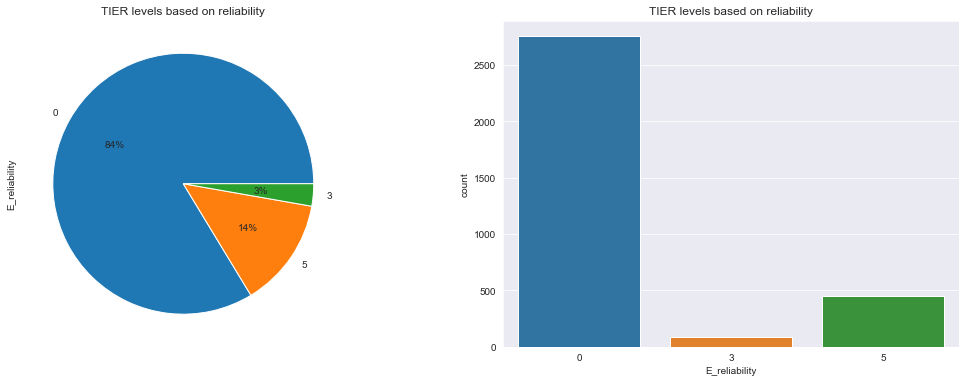

In [157]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_reliability["E_reliability"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_reliability',data=df_reliability,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attribute: Quality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C39 represents the damaged appliances from the national grid. 
* C81 represents the damaged appliances from the mini grid.
* C110 represents the damaged appliances from the generator set.
* C140 represents the damaged appliances from the Pico-hydro.

In [158]:
df_quality = df[['C39','C81','C110','C140']]

In [159]:
df["C39"][400:410]

400            No
401            No
402            No
403            No
404    Don?t know
405            No
406            No
407            No
408           Yes
409            No
Name: C39, dtype: category
Categories (3, object): [Yes < No < Don?t know]

In [160]:
len(df[df["C39"] == "Don?t know"])

133

In [161]:
df_quality.columns = ['National_grid', 'Mini_grid','Generator_set','Pico_hydro']

In [162]:
df_quality = df_quality.replace(to_replace="Don?t know",value='Missing_data')

In [163]:
df_quality = df_quality.replace(np.nan, 'Missing_data', regex=True)

In [164]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   National_grid  1591 non-null   category
 1   Mini_grid      8 non-null      category
 2   Generator_set  1 non-null      category
 3   Pico_hydro     5 non-null      category
dtypes: category(4)
memory usage: 199.0 KB


In [165]:
#Note: conditions for TIER 3 and 4 are the same and for TIER 0,1 and 2 are the same

def fun_E_quality(quality):
    if quality == 'Missing_data':
        return 0
    elif quality == "Yes":
        return 5
    else: 
        return 0

    
func = np.vectorize(fun_E_quality)
df_quality["E_quality"] = func(df_quality['National_grid'])

Text(0.5, 1.0, 'TIER levels based on reliability')

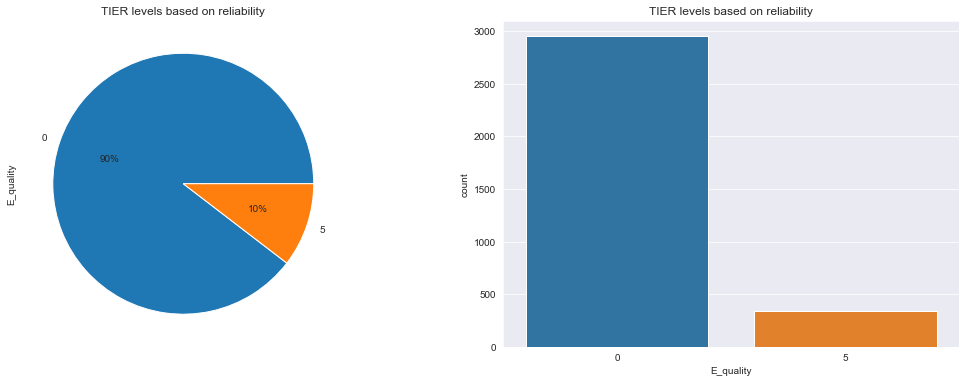

In [166]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_quality["E_quality"].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_quality',data=df_quality,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attibute: Affordability
No data about income was collected

# Attribute: Legality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C17 represents the electricity bill payment for using the national grid. 
* C57 represents the electricity bill payment for using the mini grid.

In [167]:
df_legality = df[['C17','C57']]
df_legality.columns = ['Legality_National_grid','Legality_Mini_grid']

In [168]:
df_legality['Legality_Mini_grid'].value_counts()

No bill for electricity                    2
Fixed monthly fee                          2
Other                                      1
Pay based on lights and appliances used    1
Name: Legality_Mini_grid, dtype: int64

In [169]:
df_legality['Legality_National_grid'].value_counts()

Pre-paid                                   1400
Fixed monthly fee                           109
Pay based on lights and appliances used      41
No bill for electricity                      32
Other                                        24
Monthly bill                                 14
We never used electricity                    10
Utility estimates consumption                 2
Name: Legality_National_grid, dtype: int64

In [170]:
# Values vor mini-grid will be neglected

In [171]:
df_legality['Legality_National_grid_f'] = pd.factorize(df_legality['Legality_National_grid'])[0]

In [172]:
df_legality['Legality_National_grid_f'].value_counts()

-1    1663
 1    1400
 2     109
 0      41
 6      32
 3      24
 4      14
 7      10
 5       2
Name: Legality_National_grid_f, dtype: int64

In [173]:
def fun_E_legality(National_grid):
    if National_grid == -1:
        return 0
    elif National_grid == 6 or National_grid == 7:
        return 0
    else:
        return 5
    
func = np.vectorize(fun_E_legality)
# "C17f" = Naional_grid
df_legality["E_legality"] = func(df_legality["Legality_National_grid_f"])

Text(0.5, 1.0, 'TIER levels based on reliability')

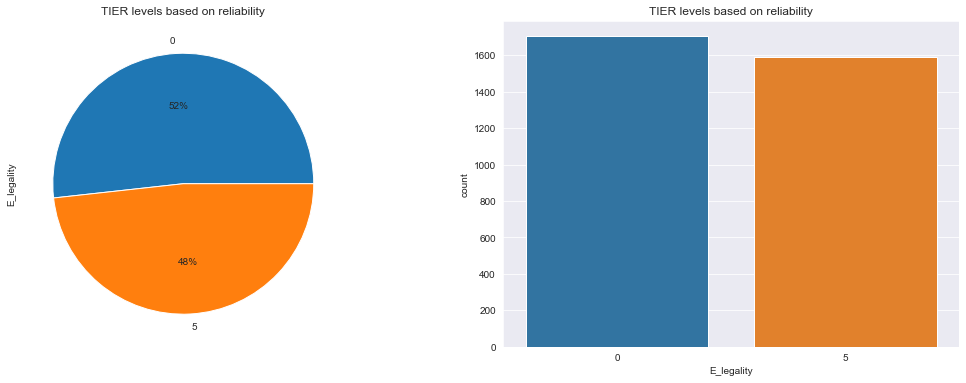

In [174]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_legality['E_legality'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_legality',data=df_legality,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attribute: Health and Safety

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C41 represents the accidents caused using the national grid. 
* C83 represents the accidents caused using the mini grid.
* C112 represents the accidents caused using the generator set.
* C130 represents the accidents caused using the battery.
* C142 represents the accidents caused using the Pico-hydro.
* C175 represents the accidents caused using the solar based devices.

In [175]:
df_health= df[['C41','C83','C112','C130','C142','C175']]

In [176]:
df['C41'].value_counts()

No     1575
Yes       6
Name: C41, dtype: int64

In [177]:
df_health.columns = ['National_grid', 'Mini_grid','Generator_set','Battery','Pico_hydro','Solar_devices']

In [178]:
df_health = df_health.replace(np.nan, 'Missing_data')
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   National_grid  1581 non-null   category
 1   Mini_grid      8 non-null      category
 2   Generator_set  1 non-null      category
 3   Battery        4 non-null      category
 4   Pico_hydro     5 non-null      category
 5   Solar_devices  110 non-null    category
dtypes: category(6)
memory usage: 205.6 KB


In [179]:
df_health["National_grid"].value_counts()

No     1575
Yes       6
Name: National_grid, dtype: int64

In [180]:
def fun_E_health(National_grid):
    if National_grid == 'No':
        return 5
    elif National_grid=='Yes' :
        return 0    
    else:
        return 0
    
func = np.vectorize(fun_E_health)
df_health["E_health"] = func(df_health["National_grid"])

Text(0.5, 1.0, 'TIER levels based on reliability')

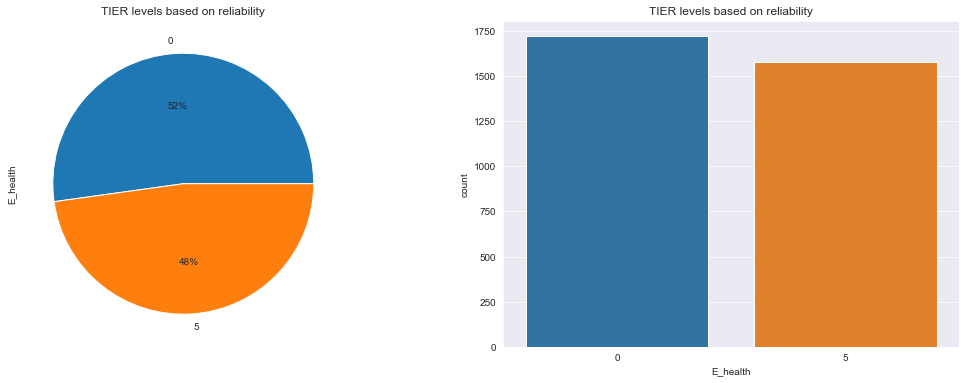

In [181]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_health['E_health'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('E_health',data=df_health,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Total Atributes

In [182]:
df_Attributes = pd.DataFrame([df_capacity["Total_Capacity_in_kWh_month"],df_availability_day['National_grid_Total'],df_availability_evening["Total_availability"],df_reliability['Total_reliability'],df_quality['National_grid'],df_legality['Legality_National_grid_f'],df_health["National_grid"]])
Attributes_MTF_Rwanda = df_Attributes.T
Attributes_MTF_Rwanda.columns = ['Total_Capacity_in_kWh_month','Total_Availability_day_in_hours','Total_Availability_evening_in_hours','Total_Reliability','Total_Quality','Total_Legality','Total_Health']

Attributes_MTF_Rwanda.to_csv('Attributes_MTF_Rwanda.csv')
Attributes_MTF_Rwanda.columns

Index(['Total_Capacity_in_kWh_month', 'Total_Availability_day_in_hours',
       'Total_Availability_evening_in_hours', 'Total_Reliability',
       'Total_Quality', 'Total_Legality', 'Total_Health'],
      dtype='object')

# Calculating E_Index

In [183]:
# Filling the index table
df_MTF = pd.DataFrame([df_capacity["E_capacity"], df_availability_day['E_availability_day'], df_availability_evening['E_availability_evening'], df_reliability["E_reliability"], df_quality["E_quality"], df_legality['E_legality'], df_health['E_health']])
HH_MTF_Rwanda = df_MTF.T
HH_MTF_Rwanda.columns

Index(['E_capacity', 'E_availability_day', 'E_availability_evening',
       'E_reliability', 'E_quality', 'E_legality', 'E_health'],
      dtype='object')

In [184]:
HH_MTF_Rwanda['E_capacity'].value_counts()

0    1810
3     746
2     451
4     192
5      96
Name: E_capacity, dtype: int64

In [185]:
HH_MTF_Rwanda['E_capacity'].values

array([0, 0, 0, ..., 3, 2, 0])

In [186]:
w_capacity_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 0])/len(HH_MTF_Rwanda["E_capacity"])
w_capacity_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 1])/len(HH_MTF_Rwanda["E_capacity"])
w_capacity_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 2])/len(HH_MTF_Rwanda["E_capacity"])
w_capacity_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 3])/len(HH_MTF_Rwanda["E_capacity"])
w_capacity_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 4])/len(HH_MTF_Rwanda["E_capacity"])
w_capacity_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_capacity"] == 5])/len(HH_MTF_Rwanda["E_capacity"])

w_capacity_5+w_capacity_4+w_capacity_3+w_capacity_2+w_capacity_1+w_capacity_0

1.0

In [187]:
w_availability_day_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 0])/len(HH_MTF_Rwanda["E_availability_day"])
w_availability_day_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 1])/len(HH_MTF_Rwanda["E_availability_day"])
w_availability_day_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 2])/len(HH_MTF_Rwanda["E_availability_day"])
w_availability_day_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 3])/len(HH_MTF_Rwanda["E_availability_day"])
w_availability_day_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 4])/len(HH_MTF_Rwanda["E_availability_day"])
w_availability_day_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_day"] == 5])/len(HH_MTF_Rwanda["E_availability_day"])

w_availability_day_5+w_availability_day_4+w_availability_day_3+w_availability_day_2+w_availability_day_1+w_availability_day_0

1.0

In [188]:
w_availability_evening_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 0])/len(HH_MTF_Rwanda["E_availability_evening"])
w_availability_evening_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 1])/len(HH_MTF_Rwanda["E_availability_evening"])
w_availability_evening_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 2])/len(HH_MTF_Rwanda["E_availability_evening"])
w_availability_evening_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 3])/len(HH_MTF_Rwanda["E_availability_evening"])
w_availability_evening_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 4])/len(HH_MTF_Rwanda["E_availability_evening"])
w_availability_evening_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_availability_evening"] == 5])/len(HH_MTF_Rwanda["E_availability_evening"])

w_availability_evening_5+w_availability_evening_4+w_availability_evening_3+w_availability_evening_2+w_availability_evening_1+w_availability_evening_0

1.0

In [189]:
w_reliability_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 0])/len(HH_MTF_Rwanda["E_reliability"])
w_reliability_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 1])/len(HH_MTF_Rwanda["E_reliability"])
w_reliability_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 2])/len(HH_MTF_Rwanda["E_reliability"])
w_reliability_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 3])/len(HH_MTF_Rwanda["E_reliability"])
w_reliability_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 4])/len(HH_MTF_Rwanda["E_reliability"])
w_reliability_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_reliability"] == 5])/len(HH_MTF_Rwanda["E_reliability"])

w_reliability_5+w_reliability_4+w_reliability_3+w_reliability_2+w_reliability_1+w_reliability_0

1.0

In [190]:
w_quality_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 0])/len(HH_MTF_Rwanda["E_quality"])
w_quality_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 1])/len(HH_MTF_Rwanda["E_quality"])
w_quality_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 2])/len(HH_MTF_Rwanda["E_quality"])
w_quality_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 3])/len(HH_MTF_Rwanda["E_quality"])
w_quality_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 4])/len(HH_MTF_Rwanda["E_quality"])
w_quality_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_quality"] == 5])/len(HH_MTF_Rwanda["E_quality"])

w_quality_5+w_quality_4+w_quality_3+w_quality_2+w_quality_1+w_quality_0

1.0

In [191]:
w_legality_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 0])/len(HH_MTF_Rwanda["E_legality"])
w_legality_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 1])/len(HH_MTF_Rwanda["E_legality"])
w_legality_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 2])/len(HH_MTF_Rwanda["E_legality"])
w_legality_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 3])/len(HH_MTF_Rwanda["E_legality"])
w_legality_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 4])/len(HH_MTF_Rwanda["E_legality"])
w_legality_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_legality"] == 5])/len(HH_MTF_Rwanda["E_legality"])

w_legality_5+w_legality_4+w_legality_3+w_legality_2+w_legality_1+w_legality_0

1.0

In [192]:
w_health_0 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 0])/len(HH_MTF_Rwanda["E_health"])
w_health_1 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 1])/len(HH_MTF_Rwanda["E_health"])
w_health_2 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 2])/len(HH_MTF_Rwanda["E_health"])
w_health_3 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 3])/len(HH_MTF_Rwanda["E_health"])
w_health_4 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 4])/len(HH_MTF_Rwanda["E_health"])
w_health_5 = len(HH_MTF_Rwanda[HH_MTF_Rwanda["E_health"] == 5])/len(HH_MTF_Rwanda["E_health"])

w_health_5+w_health_4+w_health_3+w_health_2+w_health_1+w_health_0

1.0

In [193]:
# initiate the column w_index
#HH_MTF_Rwanda['w_index'] = HH_MTF_Rwanda["E_capacity"]

In [194]:
# find all the indices where c1 is equal to 'Value' using .loc, and assign your desired value in c2 at those indices
#df.loc[df['c1'] == 'Value', 'c2'] = 10
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 0, 'w_capacity_index'] = w_capacity_0*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 1, 'w_capacity_index'] = w_capacity_1*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 2, 'w_capacity_index'] = w_capacity_2*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 3, 'w_capacity_index'] = w_capacity_3*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 4, 'w_capacity_index'] = w_capacity_4*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_capacity"] == 5, 'w_capacity_index'] = w_capacity_5*HH_MTF_Rwanda["E_capacity"]
HH_MTF_Rwanda['w_capacity_i']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3290    0.000000
3291    0.058270
3292    0.087405
3293    0.058270
3294    0.000000
Name: w_capacity_i, Length: 3295, dtype: float64

In [195]:
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 0, 'w_availability_day_index'] = w_availability_day_0*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 1, 'w_availability_day_index'] = w_availability_day_1*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 2, 'w_availability_day_index'] = w_availability_day_2*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 3, 'w_availability_day_index'] = w_availability_day_3*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 4, 'w_availability_day_index'] = w_availability_day_4*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_day"] == 5, 'w_availability_day_index'] = w_availability_day_5*HH_MTF_Rwanda["E_availability_day"]
HH_MTF_Rwanda['w_availability_day_i']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3290    0.000000
3291    0.470713
3292    0.627618
3293    0.784522
3294    0.000000
Name: w_availability_day_i, Length: 3295, dtype: float64

In [196]:
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 0, 'w_availability_evening_index'] = w_availability_evening_0*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 1, 'w_availability_evening_index'] = w_availability_evening_1*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 2, 'w_availability_evening_index'] = w_availability_evening_2*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 3, 'w_availability_evening_index'] = w_availability_evening_3*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 4, 'w_availability_evening_index'] = w_availability_evening_4*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_availability_evening"] == 5, 'w_availability_evening_index'] = w_availability_evening_5*HH_MTF_Rwanda["E_availability_evening"]
HH_MTF_Rwanda['w_availability_evening_i']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3290    0.0
3291    0.0
3292    0.0
3293    0.0
3294    0.0
Name: w_availability_evening_i, Length: 3295, dtype: float64

In [197]:
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 0, 'w_reliability_index'] = w_reliability_0*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 1, 'w_reliability_index'] = w_reliability_1*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 2, 'w_reliability_index'] = w_reliability_2*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 3, 'w_reliability_index'] = w_reliability_3*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 4, 'w_reliability_index'] = w_reliability_4*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_reliability"] == 5, 'w_reliability_index'] = w_reliability_5*HH_MTF_Rwanda["E_reliability"]
HH_MTF_Rwanda['w_reliability_i']

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.0000
         ...  
3290    0.0000
3291    0.6783
3292    0.6783
3293    0.0000
3294    0.0000
Name: w_reliability_i, Length: 3295, dtype: float64

In [198]:
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 0, 'w_quality_index'] = w_quality_0*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 1, 'w_quality_index'] = w_quality_1*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 2, 'w_quality_index'] = w_quality_2*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 3, 'w_quality_index'] = w_quality_3*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 4, 'w_quality_index'] = w_quality_4*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_quality"] == 5, 'w_quality_index'] = w_quality_5*HH_MTF_Rwanda["E_quality"]
HH_MTF_Rwanda['w_quality_i']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3290    0.000000
3291    0.520486
3292    0.000000
3293    0.000000
3294    0.000000
Name: w_quality_i, Length: 3295, dtype: float64

In [199]:
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 0, 'w_legality_index'] = w_legality_0*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 1, 'w_legality_index'] = w_legality_1*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 2, 'w_legality_index'] = w_legality_2*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 3, 'w_legality_index'] = w_legality_3*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 4, 'w_legality_index'] = w_legality_4*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_legality"] == 5, 'w_legality_index'] = w_legality_5*HH_MTF_Rwanda["E_legality"]
HH_MTF_Rwanda['w_legality_i']

0       2.412747
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3290    0.000000
3291    2.412747
3292    2.412747
3293    2.412747
3294    0.000000
Name: w_legality_i, Length: 3295, dtype: float64

In [200]:
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 0, 'w_health_index'] = w_health_0*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 1, 'w_health_index'] = w_health_1*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 2, 'w_health_index'] = w_health_2*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 3, 'w_health_index'] = w_health_3*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 4, 'w_health_index'] = w_health_4*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i'] = HH_MTF_Rwanda.loc[HH_MTF_Rwanda["E_health"] == 5, 'w_health_index'] = w_health_5*HH_MTF_Rwanda["E_health"]
HH_MTF_Rwanda['w_health_i']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3290    0.000000
3291    2.389985
3292    2.389985
3293    2.389985
3294    0.000000
Name: w_health_i, Length: 3295, dtype: float64

In [201]:
HH_MTF_Rwanda['E_Index'] = HH_MTF_Rwanda['w_capacity_i'] + (HH_MTF_Rwanda['w_availability_day_i'] + HH_MTF_Rwanda['w_availability_evening_i'])/2 + HH_MTF_Rwanda['w_reliability_i'] + HH_MTF_Rwanda['w_quality_i'] + HH_MTF_Rwanda['w_legality_i'] + HH_MTF_Rwanda['w_health_i']

In [202]:
HH_MTF_Rwanda['E_Index'] = HH_MTF_Rwanda['E_Index'].round(3)
HH_MTF_Rwanda['E_Index']

0       2.413
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
3290    0.000
3291    6.295
3292    5.882
3293    5.253
3294    0.000
Name: E_Index, Length: 3295, dtype: float64

In [203]:
HH_MTF_Rwanda.to_csv('HH_MTF_Rwanda.csv')